In [1]:
import pandas as pd
import numpy as np

In [2]:
#load dataset
recipe = pd.read_json('recipies.json')
print('total of recipes:', recipe.shape[0])
recipe.head()

total of recipes: 39774


,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
recipe.groupby('cuisine').count()

,id,ingredients
cuisine,,
brazilian,467,467
british,804,804
cajun_creole,1546,1546
chinese,2673,2673
filipino,755,755
french,2646,2646
greek,1175,1175
indian,3003,3003
irish,667,667


In [4]:
recipe.groupby('cuisine').count().shape[0]

20

In [5]:
# The dataset has 20 cuisines with more than 500 recipes in each cuisine

In [6]:
# look at ingredients
recipe.ingredients[0]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [7]:
# ingredients column looks quite clean ?
# onehot encoding
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
rec2cuisine = pd.DataFrame(mlb.fit_transform(recipe['ingredients']),columns=mlb.classes_, index=recipe.index)


In [8]:
recipe = recipe.join(rec2cuisine)
recipe.head()

,cuisine,id,ingredients,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,22213,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# get common ingredients in each cuisine
recipe.drop(['id','ingredients'],axis = 1,inplace = True)

In [10]:
recipe.head()

,cuisine,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,greek,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
new_df_recipe = recipe.groupby('cuisine').sum()
new_df_recipe_transpose = new_df_recipe.T
new_df_recipe.shape[0]

20

In [12]:
#find the most common ingredients for each cuisine
for cuisine in recipe['cuisine'].unique().tolist():
    print('Cuisine:',cuisine)
    print(new_df_recipe_transpose[cuisine].sort_values(ascending = False).head(20))
    print('\n')

Cuisine: greek
salt                      571
olive oil                 503
dried oregano             266
garlic cloves             253
feta cheese crumbles      252
extra-virgin olive oil    229
fresh lemon juice         222
ground black pepper       220
garlic                    216
pepper                    203
feta cheese               191
cucumber                  187
purple onion              186
onions                    185
lemon juice               182
tomatoes                  156
water                     143
lemon                     129
fresh parsley             113
fresh dill                108
Name: greek, dtype: int64


Cuisine: southern_us
salt                   2290
butter                 1255
all-purpose flour      1222
sugar                  1054
large eggs              746
baking powder           729
water                   686
unsalted butter         655
milk                    645
buttermilk              634
eggs                    622
pepper                  549


In [13]:
#some plots
import seaborn as sns
cuisine = 'russian'
df_count=new_df_recipe_transpose[cuisine].sort_values(ascending = False).to_frame().reset_index()
df_count.rename(columns={'index':'ingredients',cuisine: 'count'},inplace=True)
sns.set(style="whitegrid")
ax = sns.barplot(y="ingredients", x="count", data=df_count.head(10))

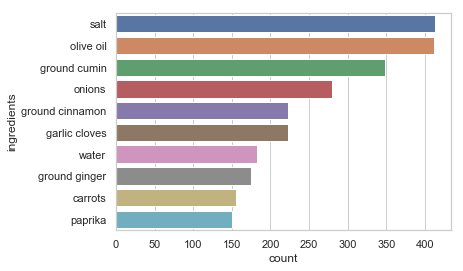

In [14]:
#some plots
#import seaborn as sns
cuisine = 'moroccan'
df_count=new_df_recipe_transpose[cuisine].sort_values(ascending = False).to_frame().reset_index()
df_count.rename(columns={'index':'ingredients',cuisine: 'count'},inplace=True)
sns.set(style="whitegrid")
ax = sns.barplot(y="ingredients", x="count", data=df_count.head(10))

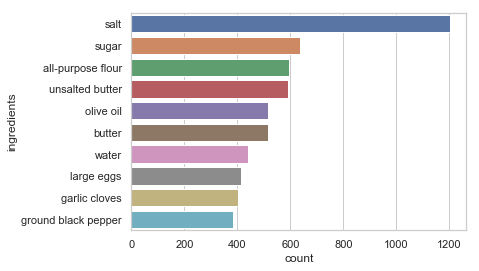

In [15]:
#some plots
#import seaborn as sns
cuisine = 'french'
df_count=new_df_recipe_transpose[cuisine].sort_values(ascending = False).to_frame().reset_index()
df_count.rename(columns={'index':'ingredients',cuisine: 'count'},inplace=True)
sns.set(style="whitegrid")
ax = sns.barplot(y="ingredients", x="count", data=df_count.head(10))

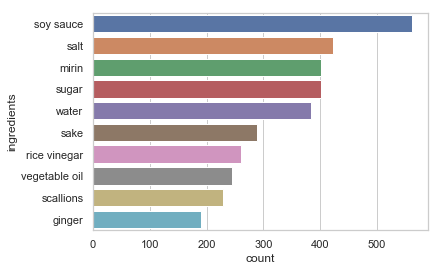

In [16]:
#some plots
#import seaborn as sns
cuisine = 'japanese'
df_count=new_df_recipe_transpose[cuisine].sort_values(ascending = False).to_frame().reset_index()
df_count.rename(columns={'index':'ingredients',cuisine: 'count'},inplace=True)
sns.set(style="whitegrid")
ax = sns.barplot(y="ingredients", x="count", data=df_count.head(10))

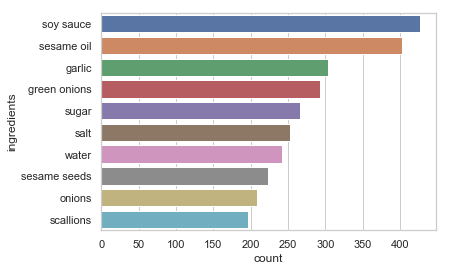

In [17]:
#some plots
#import seaborn as sns
cuisine = 'korean'
df_count=new_df_recipe_transpose[cuisine].sort_values(ascending = False).to_frame().reset_index()
df_count.rename(columns={'index':'ingredients',cuisine: 'count'},inplace=True)
sns.set(style="whitegrid")
ax = sns.barplot(y="ingredients", x="count", data=df_count.head(10))

In [18]:
# total number of individual ingredients
rec2cuisine.shape

(39774, 6714)

In [19]:
# that's too much, use the most common ingredients only
common_features = rec2cuisine.sum(axis = 0).sort_values(ascending=False)

In [20]:
common_ingredients = common_features.to_frame()
common_ingredients.reset_index(inplace = True)
common_ingredients.rename(columns={"index": "ingredients", 0: "count"},inplace = True)
common_ingredients.head()

,ingredients,count
0,salt,18048
1,onions,7972
2,olive oil,7971
3,water,7457
4,garlic,7380


In [21]:
#select only the ingredients with counts larger than 50
feature = common_ingredients['ingredients'][common_ingredients['count']>50]
len(feature)

977

In [22]:
#get total of 977 ingredients with total of 39774 recipes

In [23]:
#get dataset; train_test_split
from sklearn.model_selection import train_test_split
X = rec2cuisine[feature.tolist()]
y = recipe['cuisine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# use Decision Tree Classifier
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='gini',max_depth=100,min_samples_split=5)
dtc.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
dtc.score(X_train,y_train)

0.8301329394387001

In [26]:
#cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, X_train, y_train, cv=5)

array([0.5700612 , 0.58080729, 0.57221436, 0.58333333, 0.58385777])

In [27]:
dtc.score(X_test,y_test)

0.5764927718416091

In [28]:
# probably overfitted, reduce the number of features by feature importance
# feature importance
df_importance = pd.DataFrame()
df_importance['ingredients'] = feature
df_importance['importance'] = dtc.feature_importances_
df_importance.sort_values(by='importance',ascending=False,inplace = True)

In [29]:
df_importance.head(20)

,ingredients,importance
29,grated parmesan cheese,0.031901
13,soy sauce,0.030075
87,garam masala,0.028114
79,corn tortillas,0.024520
95,flour tortillas,0.021713
57,fish sauce,0.018332
59,avocado,0.016802
2,olive oil,0.014612
96,buttermilk,0.013788
20,ground cumin,0.013675


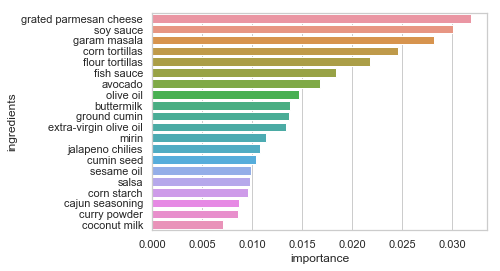

In [30]:
#import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(y="ingredients", x="importance", data=df_importance[0:20])

In [31]:
# get top 300 important ingredients
# train test split again
feature = df_importance['ingredients'][0:299]
X = rec2cuisine[feature.tolist()]
y = recipe['cuisine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# use Decision Tree Classifier with selected important ingredients
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='gini',max_depth=100)
dtc.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
dtc.score(X_train,y_train)

0.8877086017788114

In [34]:
#cross-validation
#from sklearn.model_selection import cross_val_score
cross_val_score(dtc, X_train, y_train, cv=5)


array([0.5570375 , 0.56368777, 0.56294201, 0.5586478 , 0.56702329])

In [35]:
dtc.score(X_test,y_test)

0.556002514142049

Confusion matrix, without normalization


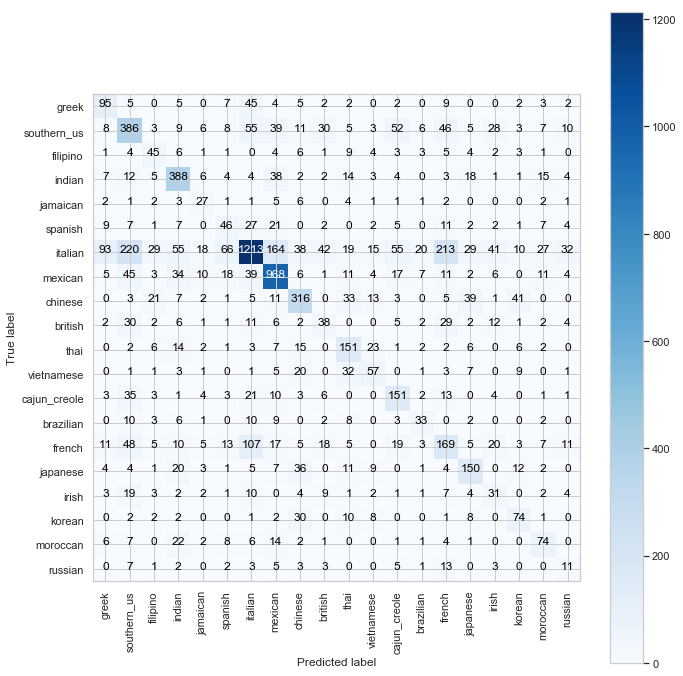

In [36]:
#still overfitted
#plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_pred,y_test,labels=recipe['cuisine'].unique().tolist())

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=recipe['cuisine'].unique().tolist(), normalize=False)
plt.show()

Normalized confusion matrix


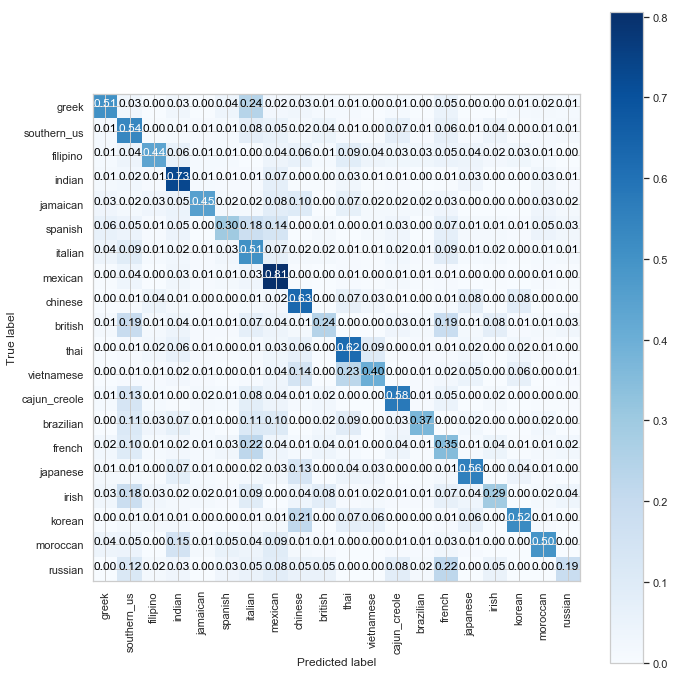

In [37]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=recipe['cuisine'].unique().tolist(), normalize=True)
plt.show()

In [38]:
# use random forest with selected important ingredients
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_train, y_train)  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
rfc.score(X_train, y_train)

0.9756749112165687

In [40]:
#cross-validation
#from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X_train, y_train, cv=5)


array([0.66169779, 0.66090781, 0.66242339, 0.67625786, 0.66504091])

In [41]:
rfc.score(X_test, y_test)

0.6736643620364551

In [42]:
# try gradient boosting classifier; but takes too long
#from sklearn.ensemble import GradientBoostingClassifier
#gbc = GradientBoostingClassifier(n_estimators=200,random_state=0)
#gbc.fit(X_train, y_train)  


In [43]:
# gbc.score(X_train, y_train)

In [44]:
# gbc.score(X_test, y_test)

Normalized confusion matrix


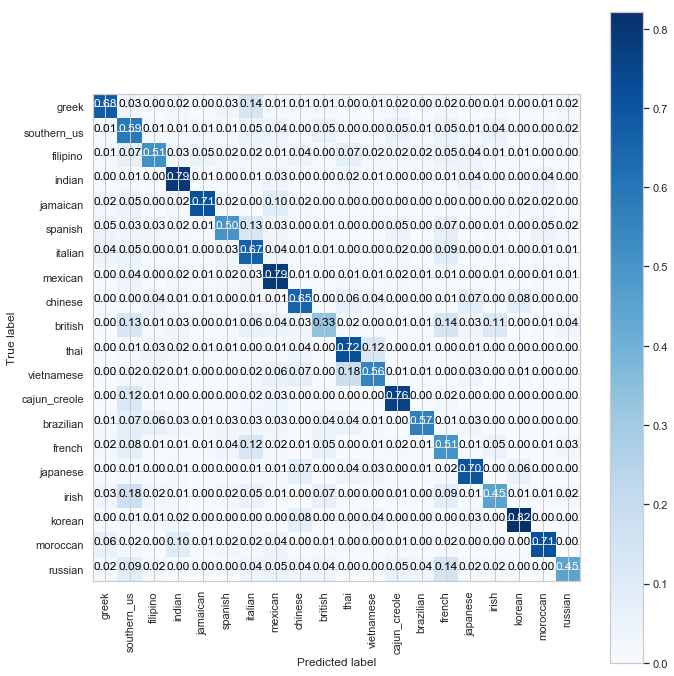

In [45]:
# build comfusion matrix on random forest result
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_pred,y_test,labels=recipe['cuisine'].unique().tolist())
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=recipe['cuisine'].unique().tolist(), normalize=True)
plt.show()

Confusion matrix, without normalization


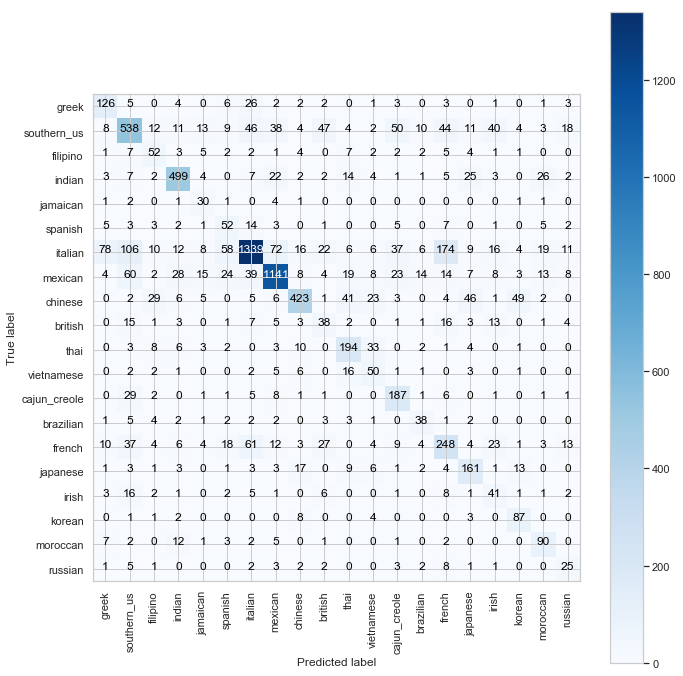

In [46]:
# no normalization
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=recipe['cuisine'].unique().tolist(), normalize=False)
plt.show()

In [47]:
# build a guideline for a few major cuisines
# italian
italian_list = recipe['cuisine']=='italian'


In [48]:
# use top 30 important ingredients
# train test split again
feature = df_importance['ingredients'][0:29]
X = rec2cuisine[feature.tolist()]
y = italian_list
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# use Decision Tree Classifier with selected important ingredients
dtc_italian = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
dtc_italian.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
dtc_italian.score(X_train, y_train)  

0.835538514723907

In [60]:
cross_val_score(dtc_italian, X_train, y_train, cv=10)


array([0.83537543, 0.83595223, 0.82872407, 0.83752357, 0.83218102,
       0.8372093 , 0.83595223, 0.83689503, 0.83652939, 0.83432883])

In [61]:
dtc_italian.score(X_test, y_test)  

0.8367064739157762

In [65]:
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(dtc_italian, out_file=None, 
                                feature_names=feature.tolist(),  
                                class_names=['yes','no'],filled = True)


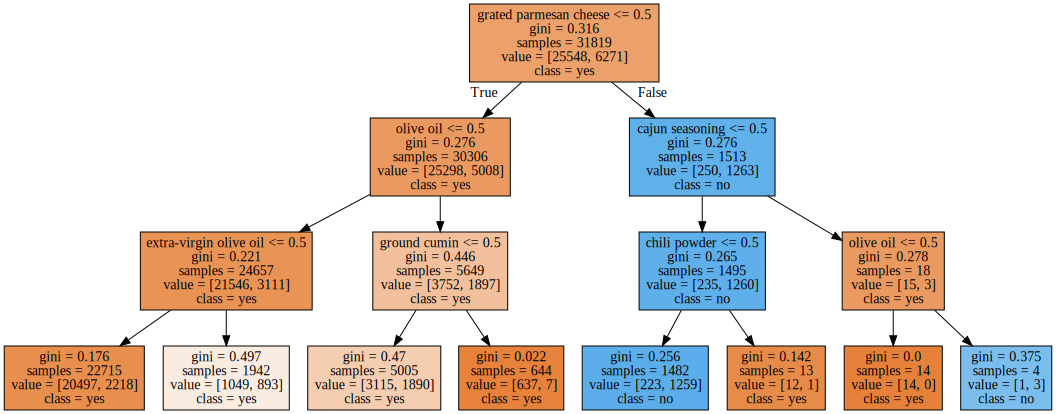

In [66]:
from IPython.display import Image  
from graphviz import Source
from IPython.display import SVG

graph = Source(dot_data)
display(SVG(graph.pipe(format='svg')))

train accuracy: 0.8951255539143279
test accuracy: 0.8876178504085481


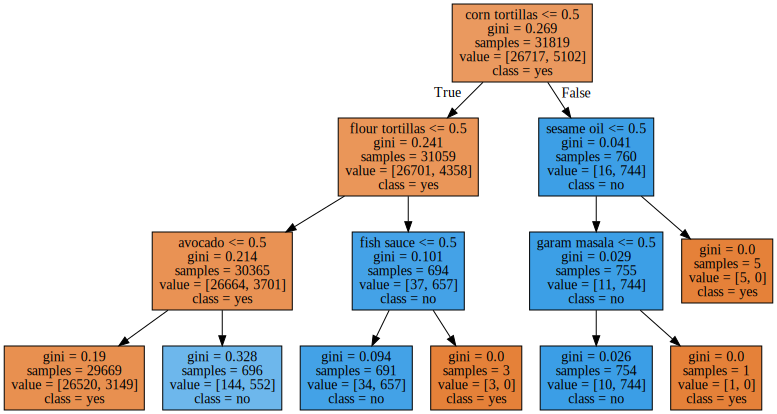

In [69]:
# build a guideline for a few major cuisines
# mexican
mexican_list = recipe['cuisine']=='mexican'
# use top 30 important ingredients
# train test split again
feature = df_importance['ingredients'][0:29]
X = rec2cuisine[feature.tolist()]
y = mexican_list
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use Decision Tree Classifier with selected important ingredients
dtc_mexican = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
dtc_mexican.fit(X_train, y_train)  
print('train accuracy:',dtc_mexican.score(X_train, y_train))  
print('test accuracy:',dtc_mexican.score(X_test, y_test))  

dot_data = tree.export_graphviz(dtc_mexican, out_file=None, 
                                feature_names=feature.tolist(),  
                                class_names=['yes','no'],filled = True)
graph = Source(dot_data)
display(SVG(graph.pipe(format='svg')))

train accuracy: 0.9721864294918131
test accuracy: 0.9710873664362036


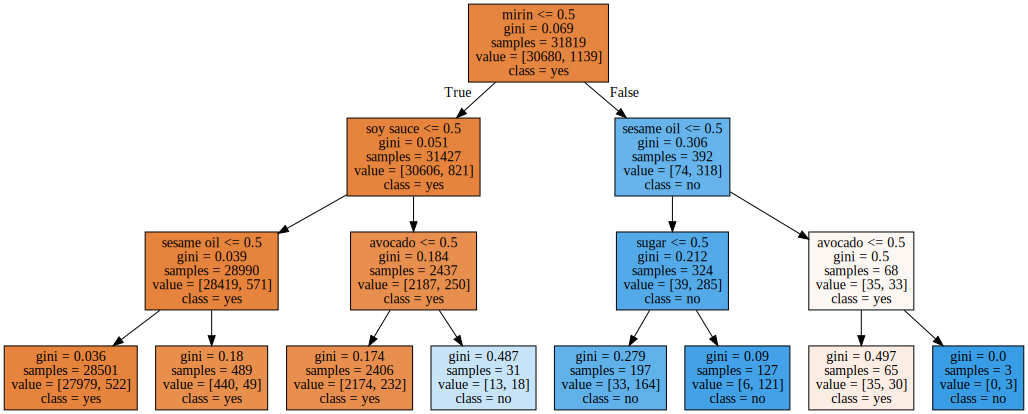

In [71]:
# build a guideline for a few major cuisines
# japanese
japanese_list = recipe['cuisine']=='japanese'
# use top 30 important ingredients
# train test split again
feature = df_importance['ingredients'][0:29]
X = rec2cuisine[feature.tolist()]
y = japanese_list
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use Decision Tree Classifier with selected important ingredients
dtc_japanese = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
dtc_japanese.fit(X_train, y_train)  
print('train accuracy:',dtc_japanese.score(X_train, y_train))  
print('test accuracy:',dtc_japanese.score(X_test, y_test))  

dot_data = tree.export_graphviz(dtc_japanese, out_file=None, 
                                feature_names=feature.tolist(),  
                                class_names=['yes','no'],filled = True)
graph = Source(dot_data)
display(SVG(graph.pipe(format='svg')))

train accuracy: 0.9521040887520035
test accuracy: 0.9516027655562539


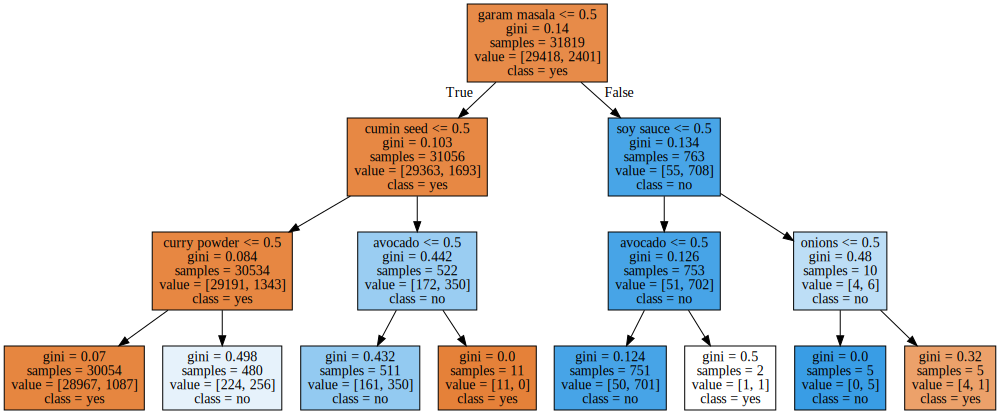

In [81]:
# build a guideline for a few major cuisines
# indian
indian_list = recipe['cuisine']=='indian'
# use top 30 important ingredients
# train test split again
feature = df_importance['ingredients'][0:29]
X = rec2cuisine[feature.tolist()]
y = indian_list
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use Decision Tree Classifier with selected important ingredients
dtc_indian = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
dtc_indian.fit(X_train, y_train)  
print('train accuracy:',dtc_indian.score(X_train, y_train))  
print('test accuracy:',dtc_indian.score(X_test, y_test))  

dot_data = tree.export_graphviz(dtc_indian, out_file=None, 
                                feature_names=feature.tolist(),  
                                class_names=['yes','no'],filled = True)
graph = Source(dot_data)
display(SVG(graph.pipe(format='svg')))